In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from utils import PkdbModel, codeine_idx, measurement_type_data, filter_out, convert_unit, unstring
plt.style.use('seaborn-white')
import numpy as np
plt.rcParams.update({
        'axes.labelsize': '20',
        'axes.labelweight': 'bold',
        'axes.titlesize': 'medium',
        'axes.titleweight': 'bold',
        'legend.fontsize': '20',
        'xtick.labelsize': '20',
        'ytick.labelsize': '20',
        'figure.facecolor': '1.00'
    })

In [79]:
all_complete = PkdbModel("all_complete", destination="2-merged")
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [80]:
all_complete.read()

/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2909: DtypeWarning: Columns (15,19,23,24,25,28,29,30,31,44,72,88,90,114,115,117,119,121,123,124,126,127,128,129,132,133,134,136,140,144,145,147,148,149,151,152,172,174,175,176,177,179,180,182,184,186,188,194,195,196,203,204,208,211,212,220,225,229,230,235,239) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [81]:
index_timecourse= (all_complete.data["output_type"]== "timecourses") 
study_index = (all_complete.data["study"] == "Loetsch2006")
substance_index = (all_complete.data["substance"] == "codeine")
substance_intervention_index = (all_complete.data["substance_intervention"] == "codeine")

In [82]:
#all_complete.data.columns.to_list()

In [83]:
all_complete.data["CYP"] = all_complete.data[('cyp2d6 phenotype', 'choice')]
all_complete.data["CYP_G"] = all_complete.data[('cyp2d6 genotype', 'choice')]


In [84]:
my_data = all_complete.data[index_timecourse & study_index & substance_index & substance_intervention_index]

In [85]:
my_data[["mean","value","median","time","value_intervention","unit","CYP","CYP_G","substance","substance_intervention"]]

,mean,value,median,time,value_intervention,unit,CYP,CYP_G,substance,substance_intervention
7934,NaN,"['3.32e-05', '1.46e-04', '6.34e-04', '5.54e-04...",NaN,"['0.00e+00', '3.00e-01', '7.00e-01', '1.30e+00...",0.03,mole / liter,em,*1/*1,codeine,codeine
8012,NaN,"['4.42e-05', '1.98e-04', '6.93e-04', '7.40e-04...",NaN,"['0.00e+00', '3.00e-01', '7.00e-01', '1.30e+00...",0.03,mole / liter,im,*7/*41,codeine,codeine
8072,NaN,"['1.94e-05', '3.33e-04', '1.50e-03', '1.10e-03...",NaN,"['3.00e-01', '5.00e-01', '8.00e-01', '1.40e+00...",0.03,mole / liter,im,*x/*4,codeine,codeine
8135,NaN,"['5.70e-06', '5.13e-05', '7.19e-04', '8.16e-04...",NaN,"['0.00e+00', '2.00e-01', '5.00e-01', '1.00e+00...",0.03,mole / liter,pm,*4/*4,codeine,codeine
8216,NaN,"['8.78e-05', '8.38e-04', '1.23e-03', '9.32e-04...",NaN,"['0.00e+00', '1.00e-01', '2.00e-01', '6.00e-01...",0.03,mole / liter,em,*1/*1,codeine,codeine
8297,NaN,"['2.27e-05', '1.48e-04', '5.80e-04', '6.82e-04...",NaN,"['1.00e-01', '3.00e-01', '5.00e-01', '1.00e+00...",0.03,mole / liter,im,*4/*41,codeine,codeine
8381,NaN,"['6.81e-05', '1.48e-04', '8.13e-04', '1.21e-03...",NaN,"['0.00e+00', '2.00e-01', '4.00e-01', '9.00e-01...",0.03,mole / liter,em,*1/*4,codeine,codeine
8462,NaN,"['0.00e+00', '1.91e-04', '6.87e-04', '7.29e-04...",NaN,"['0.00e+00', '2.00e-01', '5.00e-01', '9.00e-01...",0.03,mole / liter,em,*1/*1,codeine,codeine
8538,NaN,"['1.01e-04', '7.18e-04', '1.40e-03', '9.91e-04...",NaN,"['5.00e-02', '1.00e-01', '2.50e-01', '6.40e-01...",0.03,mole / liter,um,*1x2/*1,codeine,codeine
8604,NaN,"['8.47e-05', '8.79e-04', '9.91e-04', None, '9....",NaN,"['0.00e+00', '2.00e-01', '4.00e-01', '5.00e-01...",0.03,mole / liter,em,*1/*4,codeine,codeine


In [86]:
CYP_Categories = {"em":"r",
                 "im":"g",
                 "pm":"b",
                 "um":"black"}

In [87]:
#fig, ax = plt.subplots()
frames = []
for i, df in my_data[["time","value","CYP","CYP_G", "individual_pk"]].dropna().iterrows():
    
    time_array = pd.to_numeric(eval(df["time"]))
    value_array = pd.to_numeric(eval(df["value"]))
    time_array = pd.to_numeric(eval(df["time"]))
    new_df = pd.concat([df]*len(time_array), axis=1).T.reset_index()
    new_df["time"] = time_array
    new_df["value"] = value_array
    frames.append(new_df)
df_all = pd.concat(frames)
    
    
    
    #ax.plot(x,y, color = CYP_Categories[df["CYP"]])


In [88]:
df_all = df_all.dropna(subset=["value"])

In [89]:
pd.to_numeric(eval(df["time"]))

array([0.4, 0.5, 0.8, 1.2, 1.6, 2. , 2.4, 2.9, 3.3, 3.8, 4.3, 4.6, 5. ])

In [90]:
time_array = pd.to_numeric(eval(df["time"]))
new_df = pd.concat([df]*len(time_array), axis=1).T.reset_index()
new_df["time"] = pd.to_numeric(eval(df["time"]))
new_df["value"] = pd.to_numeric(eval(df["value"]))

In [91]:
new_df

,index,time,value,CYP,CYP_G,individual_pk
0,8677,0.4,0.000000,em,*1/*41,4193
1,8677,0.5,0.000028,em,*1/*41,4193
2,8677,0.8,0.000428,em,*1/*41,4193
3,8677,1.2,0.000621,em,*1/*41,4193
4,8677,1.6,0.000576,em,*1/*41,4193
5,8677,2.0,0.000441,em,*1/*41,4193
6,8677,2.4,0.000389,em,*1/*41,4193
7,8677,2.9,0.000329,em,*1/*41,4193
8,8677,3.3,0.000254,em,*1/*41,4193
9,8677,3.8,0.000253,em,*1/*41,4193


In [92]:
df_all.head()

,index,time,value,CYP,CYP_G,individual_pk
0,7934,0.0,0.000033,em,*1/*1,4186
1,7934,0.3,0.000146,em,*1/*1,4186
2,7934,0.7,0.000634,em,*1/*1,4186
3,7934,1.3,0.000554,em,*1/*1,4186
4,7934,1.8,0.000518,em,*1/*1,4186


In [93]:
# Plot the responses for different events and regions


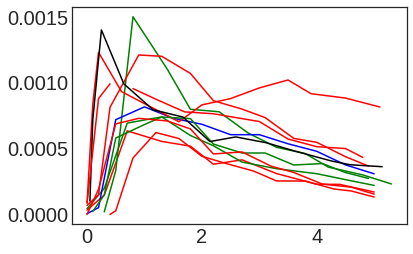

In [94]:
fig, ax = plt.subplots()
frames = []
for i, df in my_data[["time","value","CYP", "CYP_G","individual_pk"]].dropna().iterrows():
    
    time_array = pd.to_numeric(eval(df["time"]))
    value_array = pd.to_numeric(eval(df["value"]))
    time_array = pd.to_numeric(eval(df["time"]))
    new_df = pd.concat([df]*len(time_array), axis=1).T.reset_index()
    new_df["time"] = time_array
    new_df["value"] = value_array
    ax.plot(time_array,value_array, color = CYP_Categories[df["CYP"]])

    frames.append(new_df)
df_all = pd.concat(frames)
    
    
    

In [95]:
index_timecourse= (all_complete.data["output_type"]== "timecourses") 
study_index = (all_complete.data["study"] == "Wu2014")
substance_index = (all_complete.data["substance"] == "morphine")
substance_intervention_index = (all_complete.data["substance_intervention"] == "codeine")
my_data = all_complete.data[index_timecourse & study_index & substance_index & substance_intervention_index]
my_data[["mean","time","sd","se","cv"]] =  my_data[["mean","time","sd","se","cv"]].applymap(eval).applymap(pd.to_numeric)

/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,mean,time,sd,se,cv
9913,"[0.0, 0.00133, 0.00164, 0.00155, 0.00085600000...","[0.0, 0.25, 0.5, 1.0, 2.0, 3.0, 4.0, 6.0, 8.0,...","[nan, 0.00115, 0.0007019999999999999, 0.000683...","[nan, 0.000365, 0.00022200000000000003, 0.0002...","[nan, 0.8690000000000001, 0.42700000000000005,..."
9974,"[1.29e-05, 0.000309, 0.000734, 0.000721, 0.000...","[0.0, 0.25, 0.5, 1.0, 2.0, 3.0, 4.0, 6.0, 8.0,...","[nan, nan, 0.000412, 0.000348, 0.0004059999999...","[nan, nan, 0.00013000000000000002, 0.00011, 0....","[nan, nan, 0.562, 0.48200000000000004, 0.637, ..."
10035,"[0.0, 0.00028399999999999996, 0.000556, 0.0005...","[0.0, 0.25, 0.5, 1.0, 2.0, 3.0, 4.0, 6.0, 8.0,...","[nan, 0.000333, 0.000484, 0.00041, 0.000278, 0...","[nan, 0.00011100000000000001, 0.000161, 0.0001...","[nan, 1.17, 0.872, 0.698, 0.6509999999999999, ..."


In [97]:
#timecourse_data = df_all.pivot_table(values = ["mean","sd"], columns="CYP_G", index="time")
from utils import convert_unit

In [98]:
from scipy.interpolate import interp1d

In [99]:
df_all

,index,time,value,CYP,CYP_G,individual_pk
0,7934,0.00,0.000033,em,*1/*1,4186
1,7934,0.30,0.000146,em,*1/*1,4186
2,7934,0.70,0.000634,em,*1/*1,4186
3,7934,1.30,0.000554,em,*1/*1,4186
4,7934,1.80,0.000518,em,*1/*1,4186
5,7934,2.20,0.000381,em,*1/*1,4186
6,7934,2.70,0.000414,em,*1/*1,4186
7,7934,3.30,0.000310,em,*1/*1,4186
8,7934,4.00,0.000229,em,*1/*1,4186
9,7934,4.40,0.000228,em,*1/*1,4186


KeyError: 'mean'

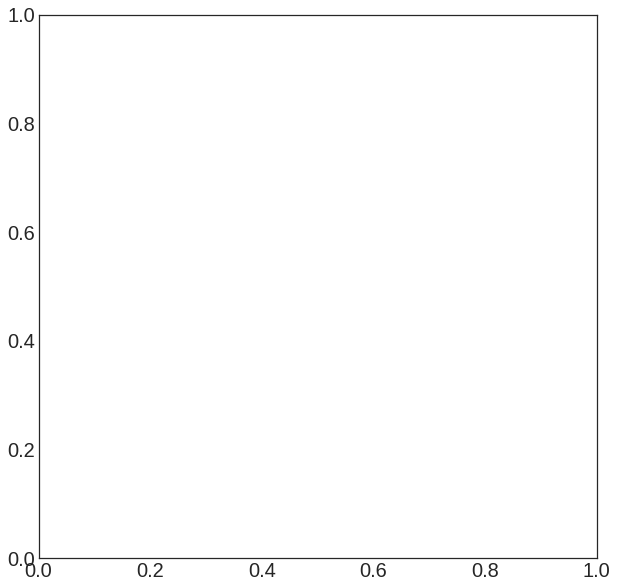

In [100]:
fig, ax = plt.subplots(figsize=(10,10))

for CYP_G, df_CYP in df_all.groupby("CYP_G"):
    #plt.errorbar(x=df_CYP["time"], y=df_CYP["mean"], label=CYP_G ,yerr=df_CYP["se"])

    plt.plot(df_CYP["time"], df_CYP["mean"], label=CYP_G)#,yerr=df_CYP["sd"])
    
    plt.fill_between(df_CYP["time"],df_CYP["mean"]-df_CYP["se"],df_CYP["mean"]+df_CYP["se"],alpha=0.4,edgecolor="gray")
    #df = df_CYP.dropna(subset=["se"])
    
    #err_low_f = interp1d(df["time"],df["mean"]-df["se"], kind='linear')
    #err_high_f = interp1d(df["time"],df["mean"]+df["se"], kind='linear')
    
    #t_err =np.linspace(df["time"].min(),df["time"].max(), num= 30, endpoint=True)
    
    #plt.fill_between(t_err,err_low_f(t_err),err_high_f(t_err),alpha=0.4,edgecolor="gray")
plt.xlabel("time [hr]")
plt.ylabel(f"concentration [{df_CYP['unit'].unique()[0]}]")

plt.legend()
#sns.pointplot(data=df_all, x="time", y="mean",ci=1, hue="CYP_G", ax=ax, err_style="band")

In [ ]:
df

In [102]:
x = df_CYP["mean"]-df_CYP["se"]
x.dropna()

KeyError: 'mean'

In [103]:
df_all

,index,time,value,CYP,CYP_G,individual_pk
0,7934,0.00,0.000033,em,*1/*1,4186
1,7934,0.30,0.000146,em,*1/*1,4186
2,7934,0.70,0.000634,em,*1/*1,4186
3,7934,1.30,0.000554,em,*1/*1,4186
4,7934,1.80,0.000518,em,*1/*1,4186
5,7934,2.20,0.000381,em,*1/*1,4186
6,7934,2.70,0.000414,em,*1/*1,4186
7,7934,3.30,0.000310,em,*1/*1,4186
8,7934,4.00,0.000229,em,*1/*1,4186
9,7934,4.40,0.000228,em,*1/*1,4186


In [104]:
index_timecourse= (all_complete.data["output_type"]== "timecourses") 
study_index = (all_complete.data["study"] == "Wu2014")
substance_index = (all_complete.data["substance_name"] == "morphine")
substance_intervention_index = (all_complete.data["substance_name_intervention"] == "codeine")
my_data = all_complete.data[index_timecourse & study_index & substance_index & substance_intervention_index]
my_data[["mean","time","sd","se","cv"]] =  my_data[["mean","time","sd","se","cv"]].applymap(eval).applymap(pd.to_numeric)

KeyError: 'substance_name'

In [105]:
intervention_pk = my_data["interventions"].unique()[0]

In [106]:
 my_data["pharmacokinetics"] = my_data["pharmacokinetics"].apply(eval).apply(lambda x: [e.get("pk") for e in x])

/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [107]:
frames = []
for i, df in my_data.iterrows():
    new_df = pd.concat([df]*len(df["pharmacokinetics"]), axis=1).T.reset_index()
    new_df["pharmacokinetics"] = df["pharmacokinetics"]
    frames.append(new_df)
#df_pk = pd.concat(frames)

In [108]:
for i, df in my_data.iterrows():
     output_pks = all_complete.data[all_complete.data["timecourse_pk"] == df["pk"]]
        

In [109]:
output_pks

,study,output_type,pk,access,measurement_type,tissue,allowed_users,substance,interventions,raw_pk,...,"(lean body mass, count)","(lean body mass, mean)","(lean body mass, sd)","(lean body mass, unit)","(fat weight, count)","(fat weight, mean)","(fat weight, se)","(fat weight, unit)",CYP,CYP_G
9983,Wu2014,outputs,76738,public,auc_inf,plasma,"[{'username': 'janekg'}, {'username': 'dimitra...",morphine,2408,76730,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,*10/*10
9984,Wu2014,outputs,76739,public,clearance,plasma,"[{'username': 'janekg'}, {'username': 'dimitra...",morphine,2408,76731,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,*10/*10
9985,Wu2014,outputs,76743,public,vd,plasma,"[{'username': 'janekg'}, {'username': 'dimitra...",morphine,2408,76735,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,*10/*10
9994,Wu2014,outputs,76740,public,cmax,plasma,"[{'username': 'janekg'}, {'username': 'dimitra...",morphine,2408,76732,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,*10/*10
10003,Wu2014,outputs,76741,public,kel,plasma,"[{'username': 'janekg'}, {'username': 'dimitra...",morphine,2408,76733,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,*10/*10
10028,Wu2014,outputs,76737,public,auc_end,plasma,"[{'username': 'janekg'}, {'username': 'dimitra...",morphine,2408,76729,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,*10/*10
10029,Wu2014,outputs,76742,public,thalf,plasma,"[{'username': 'janekg'}, {'username': 'dimitra...",morphine,2408,76734,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,*10/*10
10030,Wu2014,outputs,76744,public,tmax,plasma,"[{'username': 'janekg'}, {'username': 'dimitra...",morphine,2408,76736,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,*10/*10


In [110]:
idx = (output_pks["unit"] == u"gram * hour / liter")

In [111]:
output_pks

,study,output_type,pk,access,measurement_type,tissue,allowed_users,substance,interventions,raw_pk,...,"(lean body mass, count)","(lean body mass, mean)","(lean body mass, sd)","(lean body mass, unit)","(fat weight, count)","(fat weight, mean)","(fat weight, se)","(fat weight, unit)",CYP,CYP_G
9983,Wu2014,outputs,76738,public,auc_inf,plasma,"[{'username': 'janekg'}, {'username': 'dimitra...",morphine,2408,76730,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,*10/*10
9984,Wu2014,outputs,76739,public,clearance,plasma,"[{'username': 'janekg'}, {'username': 'dimitra...",morphine,2408,76731,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,*10/*10
9985,Wu2014,outputs,76743,public,vd,plasma,"[{'username': 'janekg'}, {'username': 'dimitra...",morphine,2408,76735,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,*10/*10
9994,Wu2014,outputs,76740,public,cmax,plasma,"[{'username': 'janekg'}, {'username': 'dimitra...",morphine,2408,76732,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,*10/*10
10003,Wu2014,outputs,76741,public,kel,plasma,"[{'username': 'janekg'}, {'username': 'dimitra...",morphine,2408,76733,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,*10/*10
10028,Wu2014,outputs,76737,public,auc_end,plasma,"[{'username': 'janekg'}, {'username': 'dimitra...",morphine,2408,76729,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,*10/*10
10029,Wu2014,outputs,76742,public,thalf,plasma,"[{'username': 'janekg'}, {'username': 'dimitra...",morphine,2408,76734,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,*10/*10
10030,Wu2014,outputs,76744,public,tmax,plasma,"[{'username': 'janekg'}, {'username': 'dimitra...",morphine,2408,76736,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,*10/*10


In [112]:
output_pks["mean"]

9983        -6.06
9984         18.7
9985        173.0
9994     0.000588
10003     0.00179
10028     0.00259
10029        6.44
10030         1.0
Name: mean, dtype: object

In [113]:
all_complete.data["timecourse_pk"]

0           NaN
1           NaN
2           NaN
3           NaN
4        7245.0
5        7249.0
6        7253.0
7        7253.0
8           NaN
9           NaN
10          NaN
11          NaN
12       7241.0
13       7241.0
14       7241.0
15       7241.0
16       7245.0
17       7253.0
18          NaN
19          NaN
20          NaN
21          NaN
22       7241.0
23       7241.0
24       7245.0
25       7245.0
26       7249.0
27       7253.0
28       7253.0
29          NaN
          ...  
12577       NaN
12578       NaN
12579       NaN
12580       NaN
12581       NaN
12582       NaN
12583       NaN
12584       NaN
12585       NaN
12586       NaN
12587       NaN
12588       NaN
12589       NaN
12590       NaN
12591       NaN
12592       NaN
12593       NaN
12594       NaN
12595       NaN
12596       NaN
12597       NaN
12598       NaN
12599       NaN
12600       NaN
12601       NaN
12602       NaN
12603       NaN
12604       NaN
12605       NaN
12606       NaN
Name: timecourse_pk, Len

In [114]:
my_data

,study,output_type,pk,access,measurement_type,tissue,allowed_users,substance,interventions,raw_pk,...,"(lean body mass, count)","(lean body mass, mean)","(lean body mass, sd)","(lean body mass, unit)","(fat weight, count)","(fat weight, mean)","(fat weight, se)","(fat weight, unit)",CYP,CYP_G
9913,Wu2014,timecourses,9236,public,concentration,plasma,"[{'username': 'janekg'}, {'username': 'dimitra...",morphine,2408,9224,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,*1/*1
9974,Wu2014,timecourses,9240,public,concentration,plasma,"[{'username': 'janekg'}, {'username': 'dimitra...",morphine,2408,9228,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,*1/*10
10035,Wu2014,timecourses,9244,public,concentration,plasma,"[{'username': 'janekg'}, {'username': 'dimitra...",morphine,2408,9232,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,*10/*10


In [115]:
frames = []
for i, df in my_data[["time","mean","sd","se","cv","CYP_G","unit"]].iterrows():
    
    
    new_df = pd.concat([df]*len(df["time"]), axis=1).T.reset_index()
    new_df["time"] = df["time"]
    new_df["mean"] = df["mean"]
    new_df["sd"] = df["sd"]
    new_df["se"] = df["se"]
    new_df["cv"] = df["cv"]
    frames.append(new_df)
df_all = pd.concat(frames)
df_all = convert_unit(df_all, "gram / liter", unit_out = "ng/ml", factor=1e+6, data_fields=["mean","sd","se"])

/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


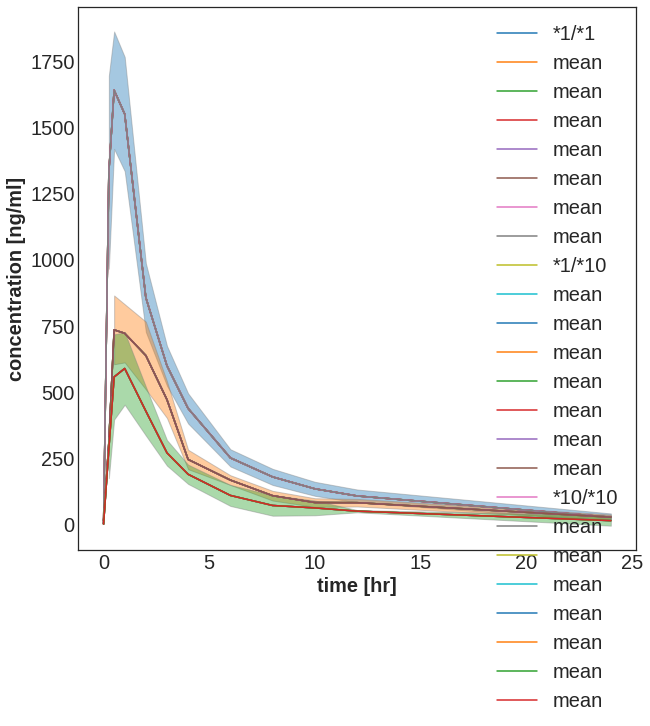

In [123]:
fig, ax = plt.subplots(figsize=(10,10))
labels = []
for CYP_G, df_CYP in df_all.groupby("CYP_G"):
    plt.fill_between(df_CYP["time"],df_CYP["mean"]-df_CYP["se"],df_CYP["mean"]+df_CYP["se"],alpha=0.4,edgecolor="gray")
    
    
    output_pks[["mean","sd","se","median"]]=output_pks[["mean","sd","se","median"]].applymap(pd.to_numeric)
    convert_unit(df=output_pks,unit_in ="gram * hour / liter", unit_out="ng/ml/hr",factor=1e+6,data_fields=["mean","sd","se","median"])
    convert_unit(output_pks,unit_in ="gram / liter",  unit_out="ng/ml", factor=1e+6,data_fields=["mean","sd","se","median"])
    convert_unit(output_pks,unit_in ="hour",  unit_out="hr", factor=1,data_fields=["mean","sd","se","median"])
    convert_unit(output_pks,unit_in ="liter / hour",  unit_out="l/hr", factor=1,data_fields=["mean","sd","se","median"])
    convert_unit(output_pks,unit_in ="liter",  unit_out="l", factor=1,data_fields=["mean","sd","se","median"])
    convert_unit(output_pks,unit_in ="1 / minute",  unit_out="1/min", factor=1,data_fields=["mean","sd","se","median"])
    label = CYP_G
    G_c=        iter([label])

    for i, output in output_pks.iterrows():
        #label += (f"{output['pk']:>10}: {output['mean']:<4} [{output['unit']}:<4]")
        try:
            l = next(G_c)
        except:
            l = None
    
        plt.plot(df_CYP["time"], df_CYP["mean"],label=l)#,yerr=df_CYP["sd"])

    
    
    
plt.xlabel("time [hr]")
plt.ylabel(f"concentration [{df_CYP['unit'].unique()[0]}]")

plt.legend()
